In [ ]:
#https://github.com/ultralytics/yolov5 - yolo v5 git repo official

In [ ]:
!nvidia-smi

Tue Jan 14 17:03:47 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5


Cloning into 'yolov5'...
remote: Enumerating objects: 17129, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 17129 (delta 32), reused 10 (delta 10), pack-reused 17080 (from 4)
Receiving objects: 100% (17129/17129), 15.83 MiB | 25.61 MiB/s, done.
Resolving deltas: 100% (11739/11739), done.
/content/yolov5


In [6]:

!pip install -qr requirements.txt
import torch

from IPython.display import Image, clear_output
from utils.downloads import attempt_download

print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.9/906.9 kB 49.9 MB/s eta 0:00:00
Setup complete. Using torch 2.5.1+cu121 CPU


In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [4]:

from roboflow import Roboflow
rf = Roboflow(api_key="DRzTV4yNrHBFMzZOus18")
project = rf.workspace("waseqalvi").project("tracketvt-bms9h-ylruv")
version = project.version(1)
dataset = version.download("yolov5")


ModuleNotFoundError: No module named 'roboflow'

In [ ]:

%pwd


'/content/yolov5'

In [ ]:

dataset.location

'/content/yolov5/TracketVT-1'

In [ ]:
%cat {dataset.location}/data.yaml #checking the yaml file

names:
- car
- person
- tank
- truck
nc: 4
roboflow:
  license: CC BY 4.0
  project: tracketvt-bms9h-ylruv
  url: https://universe.roboflow.com/waseqalvi/tracketvt-bms9h-ylruv/dataset/1
  version: 1
  workspace: waseqalvi
test: ../test/images
train: TracketVT-1/train/images
val: TracketVT-1/valid/images


In [ ]:

# number of classes based on YAML
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])


In [ ]:
num_classes #checking the number of classes- truck ,tank, person, car

'4'

In [ ]:

#this is the model configuration we will use for our tutorial
%cat /content/yolov5/models/yolov5m.yaml

# Ultralytics YOLOv5 🚀, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.67 # model depth multiple
width_multiple: 0.75 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4],

In [ ]:

#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5m.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.67 # model depth multiple
width_multiple: 0.75 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4], 1, Concat, [1]], # cat backbone P3
    [-1, 3, C3, [256, False]], # 17 (P3/8-small)

    [-1, 1, Conv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]], # cat head P4
    [-1, 3, C3, [512, False]], # 20 (P4/16-medium)

    [-1, 1, Conv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]], # cat head P5
    [-1, 3, C3, [1024, False]], # 23 (P5/32-large)

    [[17, 20, 23], 1, Detect, [nc, anchors]], # Detect(P3, P4, P5)
  ]

In [ ]:
# train yolov5s on custom data for 200 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 100 --optimizer Adam --data {dataset.location}/data.yaml --cfg ./models/custom_yolov5m.yaml --weights 'yolov5m.pt' --name yolov5m_results  --cache


Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      84/99      3.45G    0.05208    0.01689    0.01674         63        416:  38% 60/157 [00:14<00:27,  3.52it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      84/99      3.45G    0.05205    0.01698    0.01683         65        416:  39% 61/157 [00:14<00:27,  3.55it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      84/99      3.45G    0.05205    0.01693    0.01688         35        416:  39% 62/157 [00:15<00:25,  3.75it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp

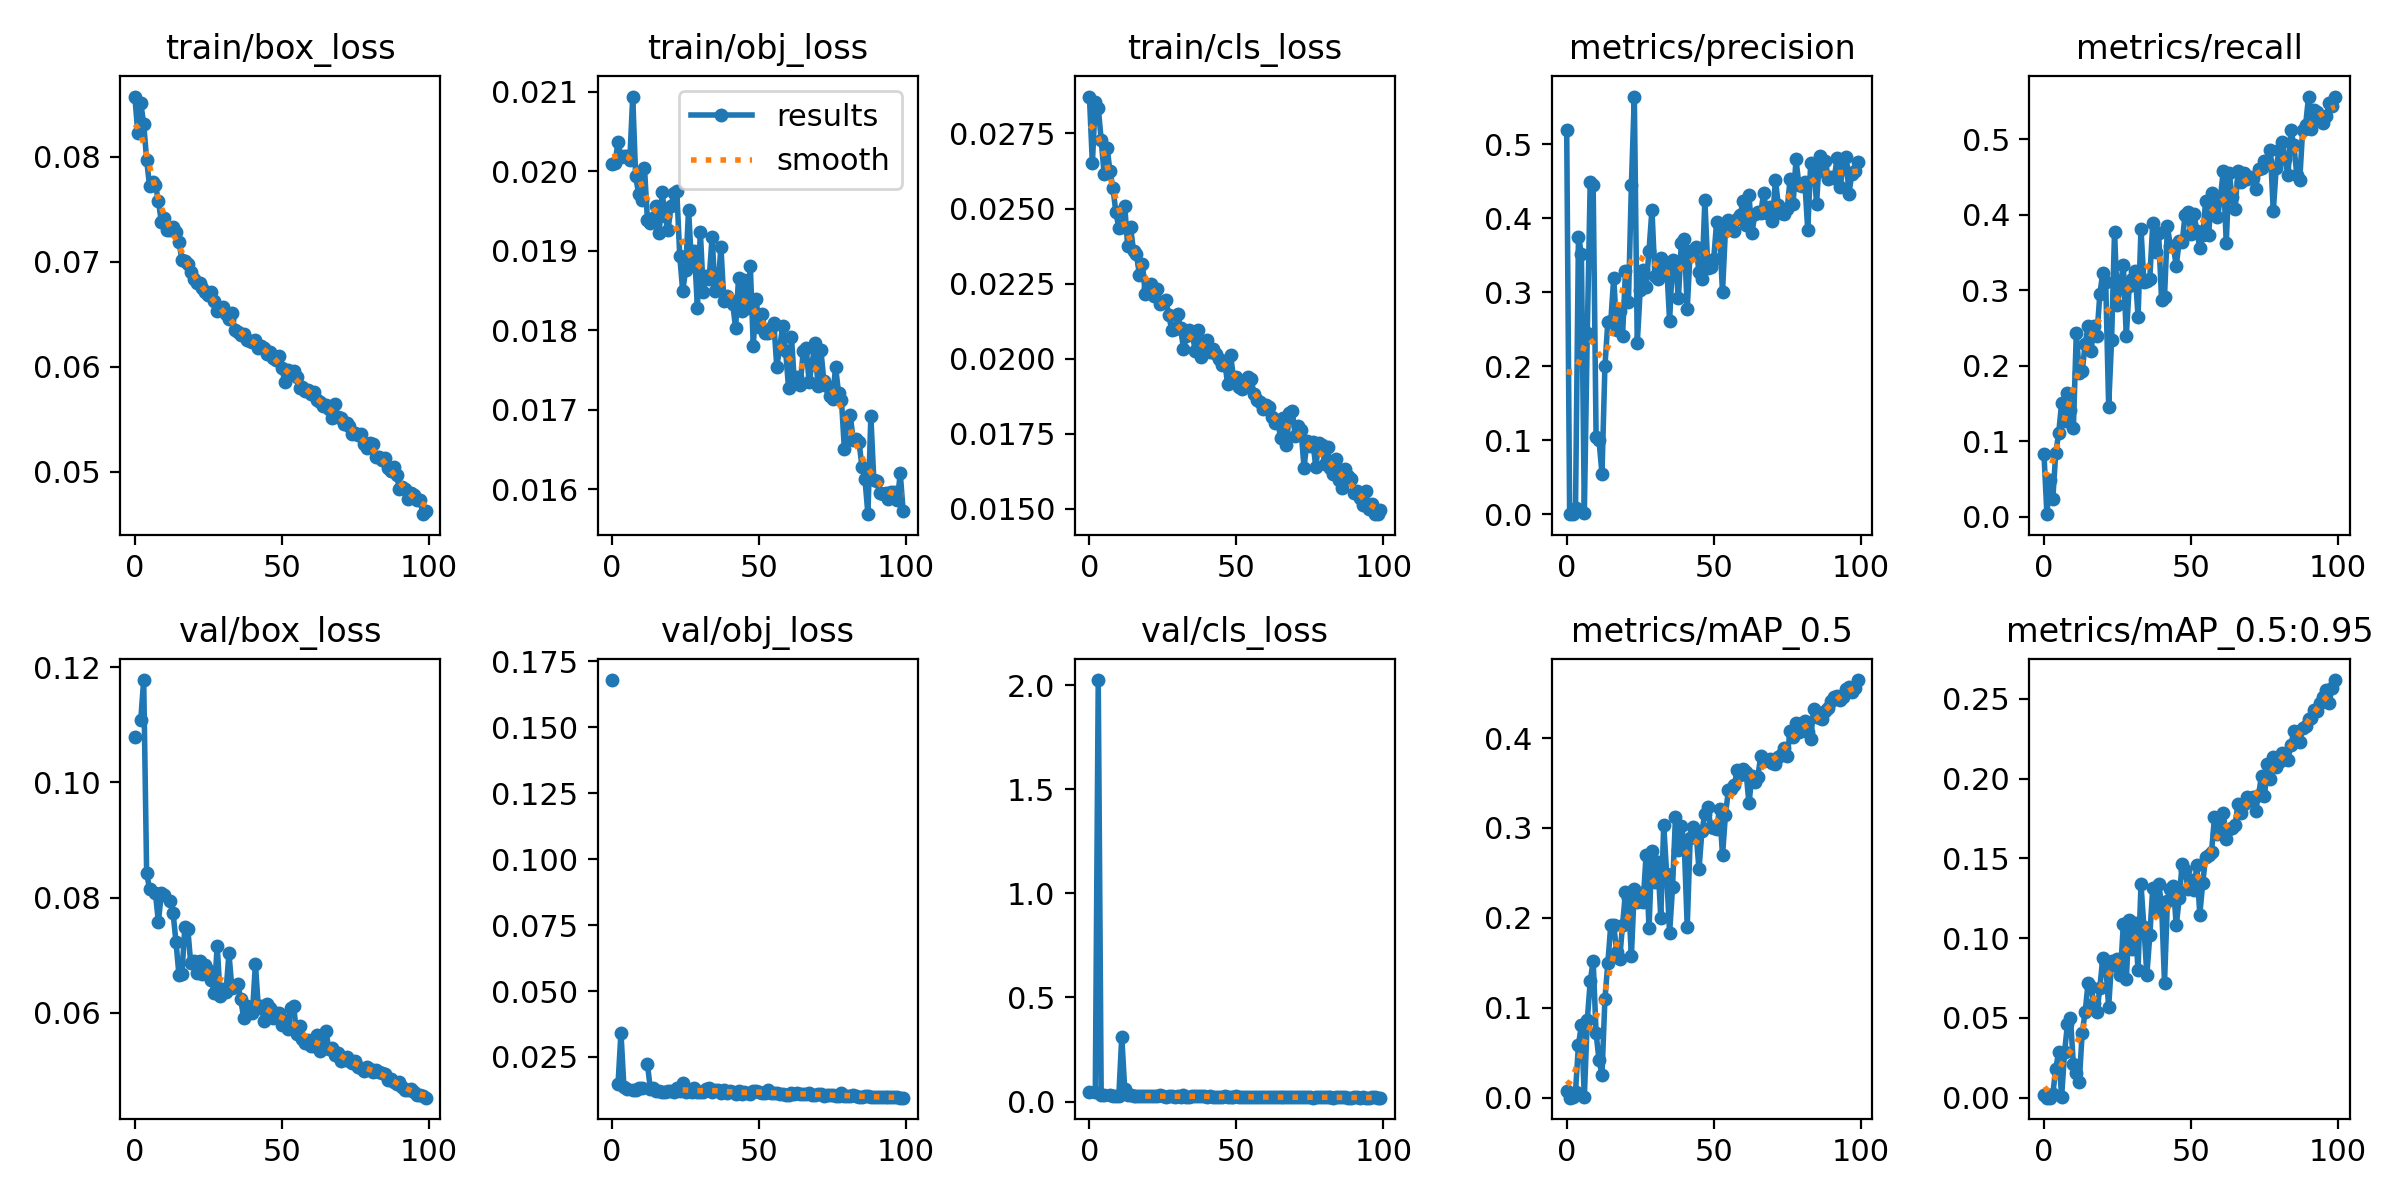

In [ ]:
from utils.plots import plot_results

# Generate the plot from the results.txt file
plot_results('/content/yolov5/runs/train/yolov5m_results2/results.txt')

# Now try displaying the image
from IPython.display import Image

Image(filename='/content/yolov5/runs/train/yolov5m_results2/results.png', width=1000)


In [ ]:

from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5m_results.png', width=1000)  # view results.png

FileNotFoundError: [Errno 2] No such file or directory: '/content/yolov5/runs/train/yolov5m_results.png'

In [ ]:
import os

# List the files in the training results directory
train_results_dir = '/content/yolov5/runs/train/yolov5m_results'
os.listdir(train_results_dir)


['weights',
 'opt.yaml',
 'events.out.tfevents.1736874302.9f300c712b2a.1071.0',
 'hyp.yaml']

In [ ]:
import os

output_dir = '/content/yolov5/runs/train/'
print(os.listdir(output_dir))


['yolov5m_results', 'yolov5m_results2']


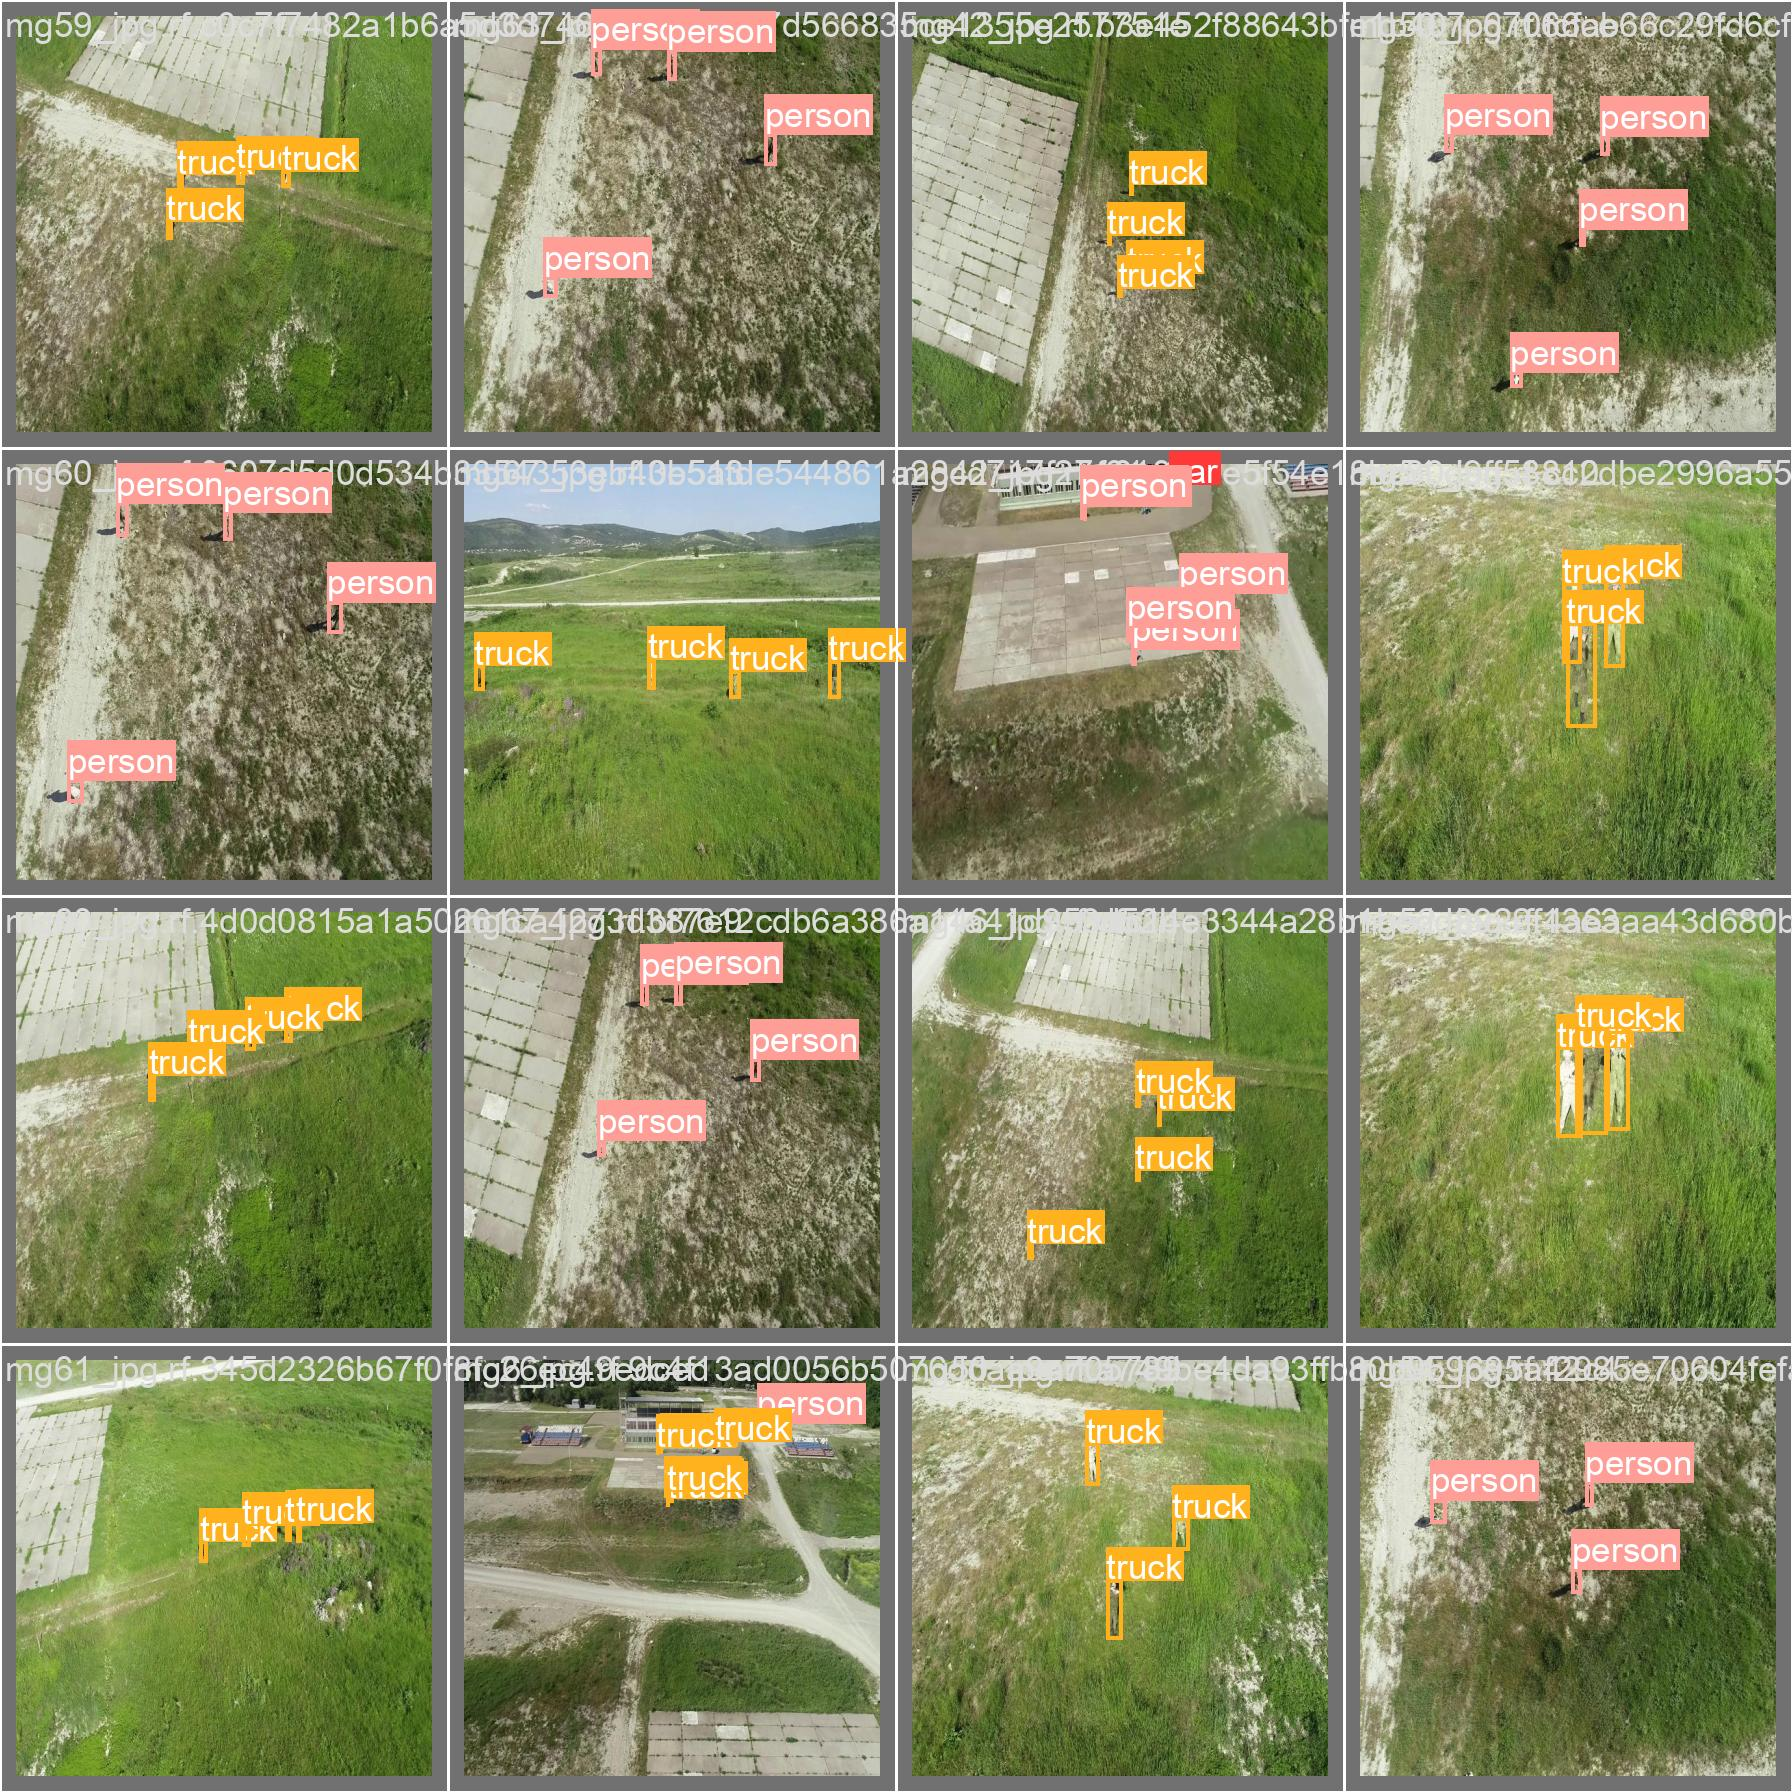

In [ ]:

Image(filename='/content/yolov5/runs/train/yolov5m_results2/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


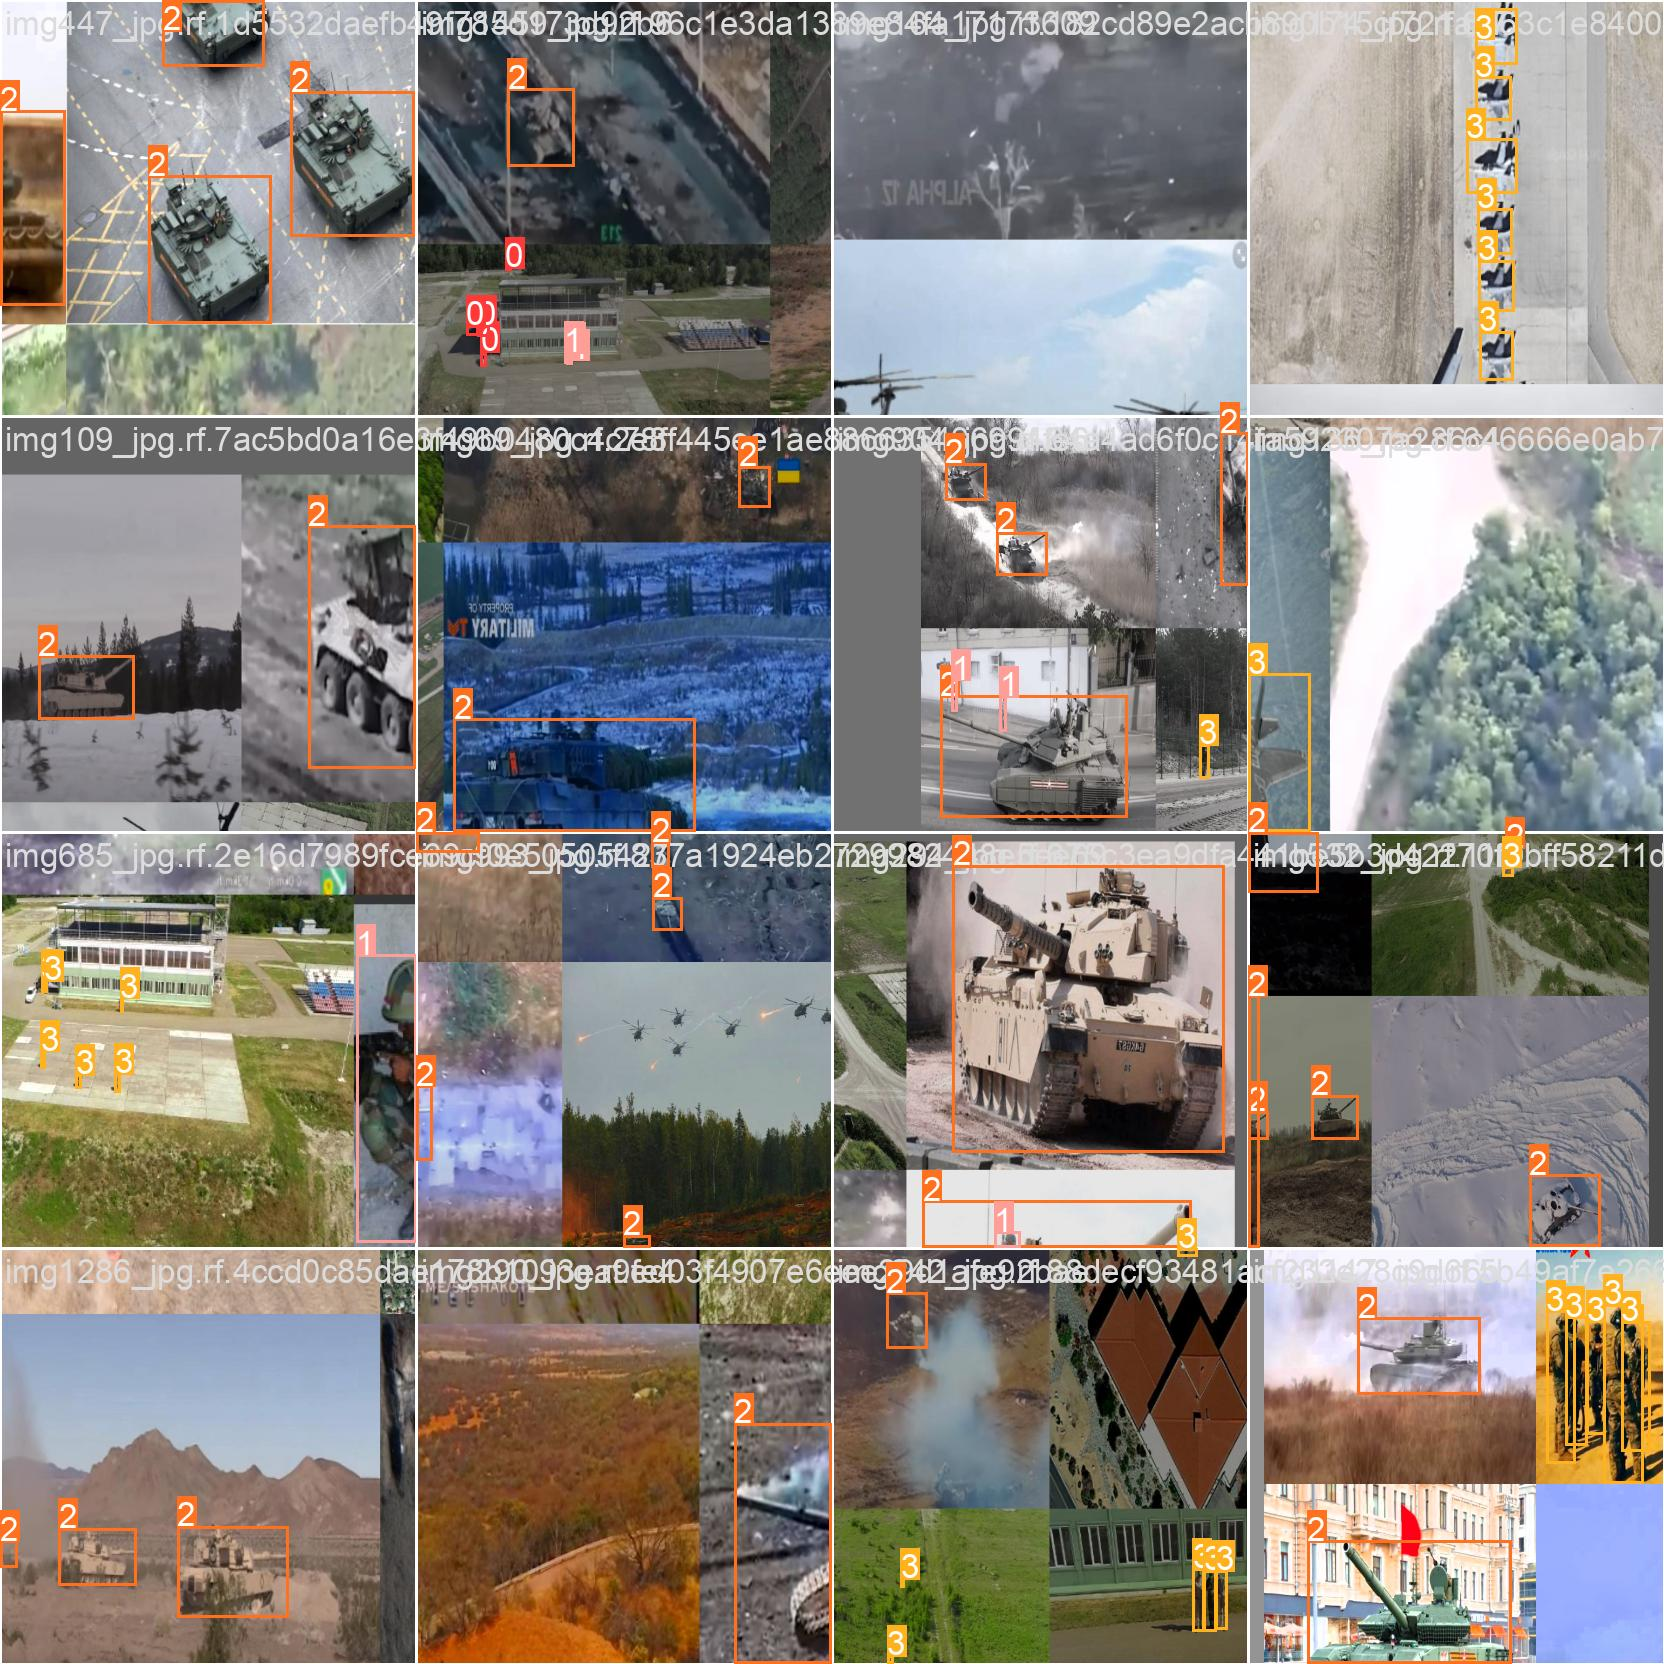

In [ ]:

# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5m_results2/train_batch0.jpg', width=900)

In [ ]:
# trained weights are saved by default in our weights folder
%ls runs/

train/


In [ ]:


%ls runs/train/yolov5m_results/weights

In [ ]:
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5m_results/weights/best.pt --img 416 --conf 0.4 --source /content/yolov5/TracketVT-1/test/images


/content/yolov5
detect: weights=['runs/train/yolov5m_results/weights/best.pt'], source=/content/yolov5/TracketVT-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-395-g6420a1db Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 438, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 433, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5/detect.py",

In [ ]:

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg')[:10]: #assuming JPG
    display(Image(filename=imageName))


In [ ]:
from pathlib import Path
import torch

# Load the model (change the path to your weights file)
model_path = Path('/content/yolov5/runs/train/yolov5m_results2/weights/best.pt')  # or 'last.pt'
model = torch.load(model_path, map_location='cpu')['model'].float()  # Load the model weights

# Set the model to evaluation mode
model.eval()


DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 48, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
      (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C3(
      (cv1): Conv(
        (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
     

In [ ]:
from PIL import Image
from torchvision import transforms

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((640, 640)),  # Resize the image to 640x640
    transforms.ToTensor(),          # Convert the image to a tensor
])

# Load the image
image_path = '/content/yolov5/TracketVT-1/test/images/img0_jpg.rf.3891d45dcf4fd5ca168ba29bd6a5d1c3.jpg'  # Change to the image you want to test
image = Image.open(image_path).convert('RGB')
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
display(image_tensor)

tensor([[[[0.54510, 0.53725, 0.53333,  ..., 0.65098, 0.64706, 0.64314],
          [0.57647, 0.55294, 0.53333,  ..., 0.66667, 0.66275, 0.66275],
          [0.55294, 0.52549, 0.52157,  ..., 0.67843, 0.67451, 0.67059],
          ...,
          [0.77255, 0.76078, 0.74902,  ..., 0.33725, 0.31765, 0.36078],
          [0.77255, 0.76078, 0.74510,  ..., 0.29020, 0.28627, 0.34118],
          [0.77255, 0.76078, 0.74510,  ..., 0.31373, 0.32941, 0.39608]],

         [[0.52157, 0.51373, 0.50980,  ..., 0.64314, 0.63922, 0.63529],
          [0.55294, 0.52941, 0.50980,  ..., 0.65882, 0.65490, 0.65490],
          [0.53725, 0.50980, 0.50588,  ..., 0.67059, 0.66667, 0.66275],
          ...,
          [0.72157, 0.70980, 0.69804,  ..., 0.33333, 0.31373, 0.35686],
          [0.72157, 0.70980, 0.69412,  ..., 0.28627, 0.28235, 0.33725],
          [0.72157, 0.70980, 0.69412,  ..., 0.30980, 0.32549, 0.39216]],

         [[0.46667, 0.45882, 0.45490,  ..., 0.58431, 0.58039, 0.57647],
          [0.50588, 0.47451, 0

In [ ]:
import shutil
import os

# Path to the YOLOv5 cache directory
cache_dir = '/root/.cache/torch/hub/ultralytics_yolov5_v6.0'

# Remove the cache directory
shutil.rmtree(cache_dir, ignore_errors=True)


In [7]:

import os
assert os.path.exists(model_path), f"Model file not found at {model_path}"
# Replace with the path to your trained model
model_path = '/content/yolov5/runs/train/yolov5m_results/weights/best.pt'

# Load the model
from models.experimental import attempt_load
model = attempt_load(model_path, map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
model.eval()  # Set the model to evaluation mode


AssertionError: Model file not found at /content/yolov5/runs/train/yolov5m_results/weights/best.pt

In [ ]:
from pathlib import Path
import torch
# Load the trained YOLOv5 model with force_reload=True
model = torch.hub.load('ultralytics/yolov5:v6.0', 'custom', path=model_path, force_reload=True)  # Add force_reload=True

# Load the trained YOLOv5 model
model_path = '/content/yolov5/runs/train/yolov5m_results/weights/best.pt'  # Path to your trained model
model = torch.hub.load('ultralytics/yolov5:v6.0', 'custom', path=model_path)  # Load custom model
model.eval()  # Set model to evaluation mode


Downloading: "https://github.com/ultralytics/yolov5/zipball/v6.0" to /root/.cache/torch/hub/v6.0.zip
YOLOv5 🚀 v7.0-395-g6420a1db Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)



requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.


Exception: Cache may be out of date, try `force_reload=True`. See https://github.com/ultralytics/yolov5/issues/36 for help.